In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data

## 1. Answer with the type of test you would use (assume normal distribution):
- Is there a difference in grades of students on the second floor compared to grades of all students?
- Are adults who drink milk taller than adults who dont drink milk?
- Is the the price of gas higher in texas or in new mexico?
- Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

In [2]:
#Is there a difference in grades of students on the 
#second floor compared to grades of all students?

# 1-sample, 2-tailed test
#h_0 : there is no difference between student grades on the 2nd floor from all students
#h_a : there is a difference between student grades on the 2nd floor from all students

In [3]:
#Are adults who drink milk taller than adults who dont drink milk?

# 2-sample, 1-tailed test
# h_0 : adults who drink milk are <= height as adults who don't drink milk
# h_a : adults who drink milk are > height as adults who don't drink milk

In [4]:
#Is the the price of gas higher in texas or in new mexico?

# 2x 2-sample, 1-tailed test
# 1-h_0 : gas price in texas is <= price in new mexico
# 1-h_a : gas price in texas is > price in new mexico
# 2-h_0 : gas price in new mexico is <= price in texas
# 2-h_a : gas price in new mexico is > price in texas

In [5]:
#Are there differences in stress levels between students who take 
#data science vs students who take web development vs students who take cloud academy?

# ANOVA: 
# scipy.stats.f_oneway
# 1-h_0 : stress of students are = stress of other students
# 1-h_a : stress of data science students != web dev students != cloud academy students

## 2. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 
A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

H$_0$ : average time to sell home at office 1 = avg time to sell home at office 2

H$_a$ : avg time to sell home at office 1 != avg time to sell home at office 2

alpha : 0.05

We will use a 2-sample, 2-tailed test : stats.ttest_ind_from_stats()

In [6]:
# assign variables to our sample stats
α = 0.05
office_1_n = 40
office_1_mean = 90
office_1_stddev = 15
office_2_n = 50
office_2_mean = 100
office_2_stddev = 20

In [7]:
office_1 = stats.norm(90, 15).rvs(40)
office_2 = stats.norm(100, 20).rvs(50)

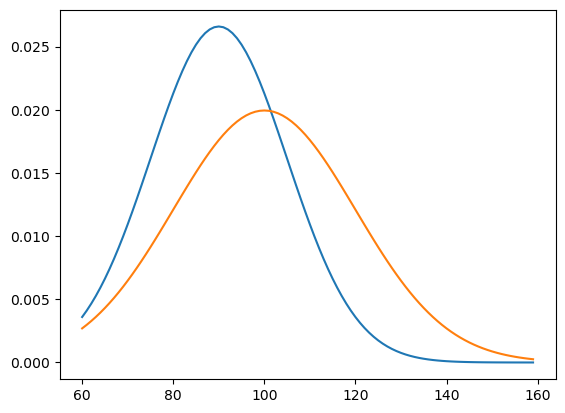

In [8]:
x = np.arange(60,160)
y = stats.norm(90, 15).pdf(x)
y2 = stats.norm(100, 20).pdf(x)
plt.plot(x, y)
plt.plot(x, y2);

#### sub-test
check for normality

In [9]:
office_1_n >= 30

True

In [10]:
office_2_n >= 30

True

both datasets are normal(ish)

### check for variance equivelency
var = $σ^2$

In [11]:
stats.levene(office_1, office_2)

LeveneResult(statistic=2.1841299818617195, pvalue=0.14301012301595195)

In [12]:
#var = σ ** 2
off_1_var = office_1_stddev ** 2
off_2_var = office_2_stddev ** 2

In [13]:
print(off_1_var)
print(off_2_var)

225
400


variances are not equal

In [14]:
t_stat, p_val = stats.ttest_ind_from_stats(
    office_1_mean, office_1_stddev, office_1_n,
    office_2_mean, office_2_stddev, office_2_n,
    equal_var=False)

In [15]:
t_stat

-2.7091418459143854

In [16]:
p_val

0.00811206270346016

In [17]:
# 2-tailed test so looking for p_val < alpha
p_val < α

True

The p_value is less than our alpha, therefore we will:

Reject H$_0$ and suggest that there is a difference in the mean time to sell a house between the 2 offices

## 3. Load the mpg dataset and use it to answer the following questions:
- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
- Are compact cars more fuel-efficient than the average car?
- Do manual cars get better gas mileage than automatic cars?

In [18]:
mpg = data('mpg')

In [19]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [20]:
#create a column for the average of cty and hwy fuel effiencies
# mpg['fuel'] = (mpg.cty + mpg.hwy) / 2 
#this is not correct mean for an average rate

# harmonic mean is used for an average of rates
mpg['fuel'] = stats.hmean((mpg.cty, mpg.hwy))

In [21]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

H$_0$ : there is no difference between avg fuel-effiency of 2008 cars and 1999 cars

H$_a$ : there is a difference between avg fuel-effiency of 2008 cars and 1999 cars

alpha : 0.05

This will be a 2-sample, 2-tailed test

In [22]:
fuel_1999 = mpg[mpg.year == 1999].fuel
fuel_2008 = mpg[mpg.year == 2008].fuel

### sub-tests
are samples normal

are variances equal

In [23]:
fuel_1999.size, fuel_2008.size

(117, 117)

sample sizes are > 30, so we can assume normal

levene test to check if variances are equal

h_0: varainces are equal

h_a: variance are different

alpha 0.05

In [24]:
#levene test to check variance equivalency
stats.levene(fuel_1999, fuel_2008)

LeveneResult(statistic=0.031071867429515194, pvalue=0.8602339200830025)

p_value of levene test is > alpha of 0.05, therefore we fail to reject the h_0, the variances are equal

In [25]:
t_stat, p_val = stats.ttest_ind(fuel_1999, fuel_2008, equal_var=True)

In [26]:
t_stat

0.3011962975077886

In [27]:
# 2-tailed test so looking for p_val < α
p_val < α

False

p_val > alpha, therefore we fail to reject the H_0, there is not enough evidence to show a difference between avg fuel effiency of vehicles from 1999 and 2008

### Are compact cars more fuel-efficient than the average car?
H$_0$ : compact car avg fuel efficiency <= that of dataset avg fuel efficiency

H$_a$ : compact car avg fuel efficiency > that of dataset avg fuel eff

alpha : 0.05

This will be a 1-sample, 1-tailed test

In [28]:
mpg['class'].value_counts()

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64

In [29]:
compact_fuel = mpg[mpg['class'] == 'compact'].fuel
avg_fuel = mpg[mpg['class'] != 'compact'].fuel.mean()

In [30]:
compact_fuel.mean()

23.500416808701296

In [31]:
avg_fuel

18.601568632712326

#### sub-tests
check if normal

In [32]:
compact_fuel.size

47

datasets are normal

In [33]:
# 1-tailed where we want to see if compact_fuel is > avg_fuel, 
#so enter compact_fuel first and look for a positive t_stat
t_stat, p_val = stats.ttest_1samp(compact_fuel, avg_fuel)

In [34]:
# t_stat needs to be positive to reject h_0
t_stat > 0

True

In [35]:
t_stat

9.400493378608301

In [36]:
# 1-tailed test so looking for p_val / 2 < α
p_val / 2 < α

True

the t_stat is > 0 and p_val/2 is < alpha, therefore we:

Reject H$_0$ there is enough evidence suggest that compact car fuel efficiency is greater than the dataset average fuel efficiency

### Do manual cars get better gas mileage than automatic cars?
H$_0$ : manual cars avg fuel efficiency is <= that of automatic transmission cars

H$_a$ : manual cars avg fuel efficiency is > that of automatic transmission cars

alpha : 0.05

this will be a 2-sample, 1-tailed test

In [37]:
mpg['is_manual'] = mpg['trans'].str.startswith('manu')

In [38]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel,is_manual
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766,False
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000,True
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725,True
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882,False
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524,False


In [39]:
manual_fuel = mpg[mpg.is_manual == True].fuel
auto_fuel = mpg[mpg.is_manual == False].fuel

#### Sub-tests
check if both datasets normal

check if variance is equal
- h_0: variances are equal
- h_a: variances are different
- alpha: 0.05

In [40]:
manual_fuel.size, auto_fuel.size

(77, 157)

both datasets are normal

In [41]:
stats.levene(manual_fuel, auto_fuel)

LeveneResult(statistic=0.013901207169738269, pvalue=0.9062462281015493)

p_val > α, therefore we fail to reject that the variances are equal

In [42]:
# 1-tailed looking for manual_fuel > auto_fuel so we enter manual_fuel first 
# and look for positive t
t_stat, p_val = stats.ttest_ind(manual_fuel, auto_fuel, equal_var=True)

In [43]:
# looking for positive t_stat in order to reject h_0
# 1-tailed test so looking for p_val/2 < α to reject h_0
(t_stat > 0) and (p_val / 2 < α)

True

t_stat is positive and p_val / 2 is less than alpha, therefore we:

Reject H$_0$ there is enough evidence to suggest that manual transmission vehicle fuel efficiency is greater than automatic transmission vehicle fuel efficiency

## Correlation
### 1. Answer with the type of stats test you would use (assume normal distribution):
- Is there a relationship between the length of your arm and the length of your foot?
- Do guys and gals quit their jobs at the same rate?
- Does the length of time of the lecture correlate with a students grade?

In [ ]:
# Is there a relationship between the length of your arm and the length of your foot?

# pearsons r test

In [ ]:
# Do guys and gals quit their jobs at the same rate?

# 2-sample, 2-tailed 

In [ ]:
# Does the length of time of the lecture correlate with a students grade?

# pearsons r test

### 2. Use the telco_churn data.
- Does tenure correlate with monthly charges?
- Total charges?
- What happens if you control for phone and internet service?

In [48]:
import env

In [49]:
connection = env.get_db_url('telco_churn')
query = '''
SELECT * 
FROM customers
	JOIN internet_service_types
		USING (internet_service_type_id);
'''
telco = pd.read_sql(query, connection)

In [50]:
telco.head()

,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,...,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,internet_service_type
0,1,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,...,Yes,Yes,No,2,Yes,2,65.6,593.3,No,DSL
1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,...,No,No,Yes,1,No,2,59.9,542.4,No,DSL
2,2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,...,No,No,No,1,Yes,1,73.9,280.85,Yes,Fiber optic
3,2,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,...,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes,Fiber optic
4,2,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,...,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes,Fiber optic


In [66]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   internet_service_type_id  7043 non-null   int64  
 1   customer_id               7043 non-null   object 
 2   gender                    7043 non-null   object 
 3   senior_citizen            7043 non-null   int64  
 4   partner                   7043 non-null   object 
 5   dependents                7043 non-null   object 
 6   tenure                    7043 non-null   int64  
 7   phone_service             7043 non-null   object 
 8   multiple_lines            7043 non-null   object 
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

In [76]:
telco['total_charges'] = telco.total_charges.str.replace(' ','0').astype(float)

In [78]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   internet_service_type_id  7043 non-null   int64  
 1   customer_id               7043 non-null   object 
 2   gender                    7043 non-null   object 
 3   senior_citizen            7043 non-null   int64  
 4   partner                   7043 non-null   object 
 5   dependents                7043 non-null   object 
 6   tenure                    7043 non-null   int64  
 7   phone_service             7043 non-null   object 
 8   multiple_lines            7043 non-null   object 
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

#### Does tenure correlate with monthly charges?
H$_0$ : there is no linear correlation between tenure and monthly charges

H$_a$ : there is a linear correlation between tenure and monthly charges

In [51]:
tenure = telco.tenure
monthly = telco.monthly_charges
α = 0.05

In [52]:
r, p = stats.pearsonr(tenure, monthly)

In [54]:
if p < α:
    print('we are able to Reject our null hypothesis')
    print('there is a linear relationship between tenure and monthly charges')
    print(f'our r value is: {r}')
else:
    print('we fail to reject our null hypothesis')

we are able to Reject our null hypothesis
our r value is: 0.24789985628615263


#### Does tenure correlate with total charges?
H$_0$ : there is no linear correlation between tenure and total charges

H$_a$ : there is a linear correlation between tenure and total charges

In [80]:
tenure = telco.tenure
total_charges = telco.total_charges
α = 0.05

In [81]:
r, p = stats.pearsonr(tenure, total_charges)

In [82]:
if p < α:
    print('we are able to Reject our null hypothesis')
    print('there is a linear relationship between tenure and total charges')
    print(f'our r value is: {r}')
else:
    print('we fail to reject our null hypothesis')

we are able to Reject our null hypothesis
there is a linear relationship between tenure and total charges
our r value is: 0.8261783979502499


### What happens if you control for phone and internet service?
H$_0$ : there is no linear correlation between tenure and total charges

H$_a$ : there is a linear correlation between tenure and total charges

In [83]:
telco.head()

,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,...,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,internet_service_type
0,1,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,...,Yes,Yes,No,2,Yes,2,65.6,593.30,No,DSL
1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,...,No,No,Yes,1,No,2,59.9,542.40,No,DSL
2,2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,...,No,No,No,1,Yes,1,73.9,280.85,Yes,Fiber optic
3,2,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,...,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes,Fiber optic
4,2,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,...,Yes,Yes,No,1,Yes,2,83.9,267.40,Yes,Fiber optic


In [84]:
telco.phone_service.value_counts()

Yes    6361
No      682
Name: phone_service, dtype: int64

In [85]:
telco.internet_service_type.value_counts()

Fiber optic    3096
DSL            2421
None           1526
Name: internet_service_type, dtype: int64

In [132]:
telco[telco.phone_service == 'No'].internet_service_type.value_counts()

DSL    682
Name: internet_service_type, dtype: int64

In [133]:
tenure_y_f = telco[(telco.phone_service == 'Yes')
                   & (telco.internet_service_type == 'Fiber optic')].tenure
total_charges_y_f = telco[(telco.phone_service == 'Yes')
                   & (telco.internet_service_type == 'Fiber optic')].total_charges
tenure_y_d = telco[(telco.phone_service == 'Yes')
                   & (telco.internet_service_type == 'DSL')].tenure
total_charges_y_d = telco[(telco.phone_service == 'Yes')
                   & (telco.internet_service_type == 'DSL')].total_charges
tenure_y_n = telco[(telco.phone_service == 'Yes')
                   & (telco.internet_service_type == 'None')].tenure
total_charges_y_n = telco[(telco.phone_service == 'Yes')
                   & (telco.internet_service_type == 'None')].total_charges
# tenure_n_f = telco[(telco.phone_service == 'No')
#                    & (telco.internet_service_type == 'Fiber optic')].tenure
# total_charges_n_f = telco[(telco.phone_service == 'No')
#                    & (telco.internet_service_type == 'Fiber optic')].total_charges
tenure_n_d = telco[(telco.phone_service == 'No')
                   & (telco.internet_service_type == 'DSL')].tenure
total_charges_n_d = telco[(telco.phone_service == 'No')
                   & (telco.internet_service_type == 'DSL')].total_charges
# tenure_n_n = telco[(telco.phone_service == 'No')
#                    & (telco.internet_service_type == 'None')].tenure
# total_charges_n_n = telco[(telco.phone_service == 'No')
#                    & (telco.internet_service_type == 'None')].total_charges

In [134]:
r_y_f, p_y_f = stats.pearsonr(tenure_y_f, total_charges_y_f)
r_y_d, p_y_d = stats.pearsonr(tenure_y_d, total_charges_y_d)
r_y_n, p_y_n = stats.pearsonr(tenure_y_n, total_charges_y_n)
# r_n_f, p_n_f = stats.pearsonr(tenure_n_f, total_charges_n_f)
r_n_d, p_n_d = stats.pearsonr(tenure_n_d, total_charges_n_d)
# r_n_n, p_n_n = stats.pearsonr(tenure_n_n, total_charges_n_n)

In [135]:
if p_y_f < α:
    print('for those who have phone service and Fiber optic internet service')
    print('we are able to Reject our null hypothesis')
    print('there is a linear relationship between tenure and total charges')
    print(f'our r value is: {r_y_f}')
    print('')
else:
    print('for those who have phone service and Fiber optic internet service')
    print('we fail to reject our null hypothesis')
    print('')

if p_y_d < α:
    print('for those who have phone service and DSL internet service')
    print('we are able to Reject our null hypothesis')
    print('there is a linear relationship between tenure and total charges')
    print(f'our r value is: {r_y_d}')
    print('')
else:
    print('for those who have phone service and DSL internet service')
    print('we fail to reject our null hypothesis')
    print('')
    
if p_y_n < α:
    print('for those who have phone service and no internet service')
    print('we are able to Reject our null hypothesis')
    print('there is a linear relationship between tenure and total charges')
    print(f'our r value is: {r_y_n}')
    print('')
else:
    print('for those who have phone service and no internet service')
    print('we fail to reject our null hypothesis')
    print('')

# if p_n_f < α:
#     print('for those without phone service and Fiber optic internet service')
#     print('we are able to Reject our null hypothesis')
#     print('there is a linear relationship between tenure and total charges')
#     print(f'our r value is: {r_n_f}')
#     print('')
# else:
#     print('for those without phone service and Fiber optic internet service')
#     print('we fail to reject our null hypothesis')
#     print('')
print('there are no customers without phone service with Fiber optic internet service')
print()

if p_n_d < α:
    print('for those without phone service and DSL internet service')
    print('we are able to Reject our null hypothesis')
    print('there is a linear relationship between tenure and total charges')
    print(f'our r value is: {r_n_d}')
    print('')
else:
    print('for those without phone service and DSL internet service')
    print('we fail to reject our null hypothesis')
    print('')
    
# if p_n_n < α:
#     print('for those without phone service and no internet service')
#     print('we are able to Reject our null hypothesis')
#     print('there is a linear relationship between tenure and total charges')
#     print(f'our r value is: {r_n_n}')
#     print('')
# else:
#     print('for those without phone service and no internet service')
#     print('we fail to reject our null hypothesis')
#     print('')
print('there are no customers without phone service and no internet service')

for those who have phone service and Fiber optic internet service
we are able to Reject our null hypothesis
there is a linear relationship between tenure and total charges
our r value is: 0.9853093528070622

for those who have phone service and DSL internet service
we are able to Reject our null hypothesis
there is a linear relationship between tenure and total charges
our r value is: 0.9705931617494691

for those who have phone service and no internet service
we are able to Reject our null hypothesis
there is a linear relationship between tenure and total charges
our r value is: 0.9815669784401068

there are no customers without phone service with Fiber optic internet service

for those without phone service and DSL internet service
we are able to Reject our null hypothesis
there is a linear relationship between tenure and total charges
our r value is: 0.9535697728407466

there are no customers without phone service and no internet service


## 3. Use the employees database.
- Is there a relationship between how long an employee has been with the company and their salary?
- Is there a relationship between how long an employee has been with the company and the number of titles they have had?

#### Is there a relationship between how long an employee has been with the company and their salary?
H$_0$ : there is no linear relationship between employee tenure and salary

H$_a$ : there is a linear relationship between employee tenure and salary

In [96]:
connection = env.get_db_url('employees')
query = '''
SELECT 
	emp_no,
    DATEDIFF(now(), hire_date) as tenure,
    salary
FROM employees
	JOIN salaries
		USING (emp_no)
WHERE to_date > now();
'''
employees_current_salaries = pd.read_sql(query, connection)

In [97]:
employees_current_salaries.head()

,emp_no,tenure,salary
0,10001,13403,88958
1,10002,13620,72527
2,10003,13340,43311
3,10004,13245,74057
4,10005,12229,94692


In [103]:
tenure = employees_current_salaries.tenure
salary = employees_current_salaries.salary
α = 0.05

In [104]:
r, p = stats.pearsonr(tenure, salary)

In [106]:
if p < α:
    print('we are able to Reject our null hypothesis')
    print('there is a linear relationship between employee tenure and salary')
    print(f'our r value is: {r}')
else:
    print('we fail to reject our null hypothesis')
    print('there is not enough evidence to suggest a linear relationship between\
 employee tenure and salary')

we are able to Reject our null hypothesis
there is a linear relationship between employee tenure and salary
our r value is: 0.30646256131860894


#### Is there a relationship between how long an employee has been with the company and the number of titles they have had?
H$_0$ : there is no relationship between employee tenure and number of titles

H$_a$ : there is a linear relationship between employee tenure and number of titles

In [101]:
connection = env.get_db_url('employees')
query = '''
SELECT 
	emp_no, 
    DATEDIFF(now(), hire_date) as tenure,
    COUNT(title) as title_count
FROM employees
	JOIN titles
		USING (emp_no)
GROUP BY emp_no;
'''
employees_title_counts = pd.read_sql(query, connection)

In [102]:
employees_title_counts.head()

,emp_no,tenure,title_count
0,10001,13403,1
1,10002,13620,1
2,10003,13340,1
3,10004,13245,2
4,10005,12229,2


In [107]:
tenure = employees_title_counts.tenure
titles = employees_title_counts.title_count
α = 0.05

In [108]:
r, p = stats.pearsonr(tenure, titles)

In [109]:
if p < α:
    print('we are able to Reject our null hypothesis')
    print('there is a linear relationship between employee tenure and number of titles')
    print(f'our r value is: {r}')
else:
    print('we fail to reject our null hypothesis')
    print('there is not enough evidence to suggest a linear relationship between\
 employee tenure and number of titles')

we are able to Reject our null hypothesis
there is a linear relationship between employee tenure and number of titles
our r value is: 0.2665989299136427


### 3. Use the sleepstudy data.
Is there a relationship between days and reaction time?

H$_0$ : there is no relationship between days and reaction time

H$_a$ : there is a linear relationship between days and reaction time

alpha : 0.05

In [110]:
sleep = data('sleepstudy')

In [111]:
sleep.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [112]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 180
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
 2   Subject   180 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 5.6 KB


In [125]:
reaction_by_day = sleep.groupby('Days').Reaction.mean().reset_index()

In [126]:
day = reaction_by_day.Days
reaction = reaction_by_day.Reaction

In [127]:
r, p = stats.pearsonr(day, reaction)

In [128]:
if p < α:
    print('we are able to Reject our null hypothesis')
    print('there is a linear relationship between days and reaction time')
    print(f'our r value is: {r}')
else:
    print('we fail to reject our null hypothesis')
    print('there is not enough evidence to suggest a linear relationship between\
 days and reaction time')

we are able to Reject our null hypothesis
there is a linear relationship between days and reaction time
our r value is: 0.9893180251905143


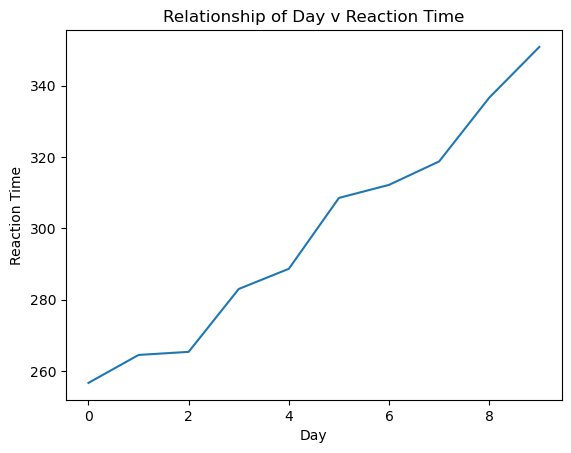

In [130]:
plt.plot(day, reaction)
plt.xlabel('Day')
plt.ylabel('Reaction Time')
plt.title('Relationship of Day v Reaction Time')
plt.show()

## Chi-squared

### 1. Answer with the type of stats test you would use (assume normal distribution):
- Do students get better test grades if they have a rubber duck on their desk?
- Does smoking affect when or not someone has lung cancer?
- Is gender independent of a person’s blood type?
- A farming company wants to know if a new fertilizer has improved crop yield or not
- Does the length of time of the lecture correlate with a students grade?
- Do people with dogs live in apartments more than people with cats?

In [ ]:
# Do students get better test grades if they have a rubber duck on their desk?

# 1-sample, 1-tailed t-test

In [ ]:
# Does smoking affect when or not someone has lung cancer?

# 1-sample, 2-tailed t-test

In [136]:
# Is gender independent of a person’s blood type?

# chi-square test

In [137]:
# A farming company wants to know if a new fertilizer has improved crop yield or not

# 1-sample, 1-tailed t-test

In [ ]:
# Does the length of time of the lecture correlate with a students grade?

# pearson r

In [138]:
# Do people with dogs live in apartments more than people with cats?

# 2-sample, 1-tailed t-test

### 2. Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

                    Codeup Student	| Not Codeup Student
    Uses a Macbook	        |49	| 20
    Doesn't Use A Macbook	| 1	    | 30

H$_0$ : the amount of macbook users is independent of if they are a codeup student

H$_a$ : the number of macbook users is dependent upon if they are a codeup student

alpha : 0.05

In [142]:
codeup = [49, 1]
not_codeup = [20, 30]
macbooks = pd.DataFrame({'codeup':codeup, 
              'not_codeup': not_codeup})
labels = ['uses a macbook', 'doesn\'t use a macbook']
macbooks.index = labels

In [143]:
macbooks

,codeup,not_codeup
uses a macbook,49,20
doesn't use a macbook,1,30


In [145]:
chi2, p, dof, expected = stats.chi2_contingency(macbooks)

In [149]:
if p < α:
    print('we are able to Reject our null hypothesis')
    print('there is enough evidence to suggest that macbook usage is dependent upon if\
 a person is a codeup student')
    print(f'the chi^2 value is {chi2}')
else:
    print('we fail to reject our null hypothesis')
    print('there is not enough evidence to suggust that macbook usage is dependent\
 upon if a person is a codeup student')

we are able to Reject our null hypothesis
there is enough evidence to suggest that macbook usage is dependent upon if a person is a codeup student
the p value is: 1.4116760526193828e-09


### Choose another 2 categorical variables from the mpg dataset and perform a $chi^2$
contingency table test with them. Be sure to state your null and alternative hypotheses.

In [151]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel,is_manual
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766,False
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000,True
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725,True
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882,False
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524,False


We will test if transmission type (is_manual) is dependent on vehicle class

H$_0$ : transmission type and vehicle class are independent of each other

H$_a$ : transmission type is dependent upon vehicle class type

alpha : 0.05

In [153]:
cross = pd.crosstab(mpg.is_manual, mpg['class'])

In [154]:
cross

class,2seater,compact,midsize,minivan,pickup,subcompact,suv
is_manual,,,,,,,
False,2,24,29,11,20,16,55
True,3,23,12,0,13,19,7


In [155]:
chi2, p, dof, expected = stats.chi2_contingency(cross)

In [156]:
if p < α:
    print('we are able to Reject our null hypothesis')
    print('there is enough evidence to suggest that transmission type\
 is dependent upon vehicle class type')
    print(f'the chi^2 value is {chi2}')
else:
    print('we fail to reject our null hypothesis')
    print('there is not enough evidence to suggest that transmission type\
 is dependent upon vehicle class type')

we are able to Reject our null hypothesis
there is enough evidence to suggest that transmission type is dependent upon vehicle class type
the chi^2 value is 33.7700251570052
